In [1]:
from datetime import datetime
from datascience import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Types

| Data Types      | Examples |
| ----------- | ----------- |
| int      | 5, 10, any whole number|
| Table   | Table()        |
|array| make_array(1,2,3), np.array(2,3,4), ...|
|str|"Hello", "Isaac", str(1)|

### Load Up Data

We begin by loading data on COVID-19 during the early times of the pandemic back in early 2020. Remember that to create a table we need to create an instance of the `Table()` object and then add columns or read in a file. How do we read in the table `covid_us.txt`?

In [2]:
def datetime_parser(string):
    datetime_object = datetime.strptime(string, '%m/%d/%y')
    return datetime_object

In [3]:
covid_us = Table().read_table("../data/covid_us.txt")

### Challenge

**Create a new column called "New Date" that applies the datetime_parser function to each item in the "Date" column.**

In [4]:
covid_us = covid_us.with_column("New Date", covid_us.apply(datetime_parser, "Date"))

Let's see what the columns are for this table. **What is the command for accessing the columns and what data type does it return?**

In [6]:
covid_us.labels

('Unnamed: 0',
 'UID',
 'iso2',
 'iso3',
 'code3',
 'FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Lat',
 'Long_',
 'Combined_Key',
 'Date',
 'Confirmed',
 'Deaths',
 'New Date')

##### Discuss with someone near you what each of these columns mean. Feel free to play around with the data to figure it out

In [7]:
covid_us.sort("Province_State")

Unnamed: 0,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths,New Date
82,84001001,US,USA,840,1001,Autauga,Alabama,US,32.5395,-86.6441,"Autauga, Alabama, US",1/22/20,0,0,2020-01-22 00:00:00
83,84001003,US,USA,840,1003,Baldwin,Alabama,US,30.7277,-87.7221,"Baldwin, Alabama, US",1/22/20,0,0,2020-01-22 00:00:00
84,84001005,US,USA,840,1005,Barbour,Alabama,US,31.8683,-85.3871,"Barbour, Alabama, US",1/22/20,0,0,2020-01-22 00:00:00
85,84001007,US,USA,840,1007,Bibb,Alabama,US,32.9964,-87.1251,"Bibb, Alabama, US",1/22/20,0,0,2020-01-22 00:00:00
86,84001009,US,USA,840,1009,Blount,Alabama,US,33.9821,-86.5679,"Blount, Alabama, US",1/22/20,0,0,2020-01-22 00:00:00
87,84001011,US,USA,840,1011,Bullock,Alabama,US,32.1003,-85.7127,"Bullock, Alabama, US",1/22/20,0,0,2020-01-22 00:00:00
88,84001013,US,USA,840,1013,Butler,Alabama,US,31.753,-86.6806,"Butler, Alabama, US",1/22/20,0,0,2020-01-22 00:00:00
89,84001015,US,USA,840,1015,Calhoun,Alabama,US,33.7748,-85.8263,"Calhoun, Alabama, US",1/22/20,0,0,2020-01-22 00:00:00
90,84001017,US,USA,840,1017,Chambers,Alabama,US,32.9136,-85.3907,"Chambers, Alabama, US",1/22/20,0,0,2020-01-22 00:00:00
91,84001019,US,USA,840,1019,Cherokee,Alabama,US,34.1781,-85.6064,"Cherokee, Alabama, US",1/22/20,0,0,2020-01-22 00:00:00


### Looking at Alameda County

After taking a look at the columns lets cut them down to just the columns we need:

**Admin2, Province_State, New Date, Confirmed, Deaths**

In [8]:
covid_us = covid_us.drop('Country_Region','UID','iso2','iso3','code3','FIPS', 'Lat', 'Long_', 'Combined_Key', 'Date')
# or .select

What is Admin2? Let's rename it to something that is easier to understand.

In [24]:
# help(covid_us.where)
covid_us.relabel("Admin2", "County")

Unnamed: 0,County,Province_State,Confirmed,Deaths,New Date
0,nan,American Samoa,0,0,2020-01-22 00:00:00
1,nan,Guam,0,0,2020-01-22 00:00:00
2,nan,Northern Mariana Islands,0,0,2020-01-22 00:00:00
3,Adjuntas,Puerto Rico,0,0,2020-01-22 00:00:00
4,Aguada,Puerto Rico,0,0,2020-01-22 00:00:00
5,Aguadilla,Puerto Rico,0,0,2020-01-22 00:00:00
6,Aguas Buenas,Puerto Rico,0,0,2020-01-22 00:00:00
7,Aibonito,Puerto Rico,0,0,2020-01-22 00:00:00
8,Anasco,Puerto Rico,0,0,2020-01-22 00:00:00
9,Arecibo,Puerto Rico,0,0,2020-01-22 00:00:00


### TEST QUESTIONS

1) **Let's practice .where! Output a filtered version of covid_us with rows only in Alameda County, California**

In [26]:
covid_california = covid_us.where('Province_State', are.equal_to('California'))
covid_alameda_county = covid_us.where('County', are.equal_to('Alameda'))
covid_alameda_county.show(5)

Unnamed: 0,County,Province_State,Confirmed,Deaths,New Date
268,Alameda,California,0,0,2020-01-22 00:00:00
3608,Alameda,California,0,0,2020-01-23 00:00:00
6948,Alameda,California,0,0,2020-01-24 00:00:00
10288,Alameda,California,0,0,2020-01-25 00:00:00
13628,Alameda,California,0,0,2020-01-26 00:00:00


2) **Count the total number of deaths from COVID in Alameda County during the time period of our dataset.**

In [27]:
sum(covid_alameda_county.column("Deaths"))

88.0

3) **What is the last date that our Alameda County dataset had information on? You should return a `datetime` data type, i.e. `2023-01-31 6:30:00`**

In [28]:
sorted_time_alameda = covid_alameda_county.sort("New Date", descending=True)
sorted_time_alameda.column("New Date").item(0)

datetime.datetime(2020, 4, 5, 0, 0)

### Challenge

**Find the county in California with the highest death totals over the entire time period we have access to.**


**Hint: use `group`**



In [29]:
covid_california.group("County", sum).sort("Deaths sum", descending=True)

County,Unnamed: 0 sum,Province_State sum,Confirmed sum,Deaths sum,New Date sum
Los Angeles,9289950,,38166,709,None
Santa Clara,9291750,,12603,421,None
Riverside,9291000,,4468,171,None
Sacramento,9291075,,3562,124,None
San Diego,9291300,,8946,112,None
San Mateo,9291600,,5234,112,None
San Joaquin,9291450,,1829,91,None
Alameda,9288600,,4348,88,None
Orange,9290775,,6903,88,None
Unassigned,9264134,,13,77,None


## Plots

| Plot Types      | When would you use? |
| ----------- | ----------- |
| scatter      | comparing relationship between two or more continuous/numeric variables|
| line   | numeric variable on the y, usually time variable on the x; use it when looking over time for a particular variable       |
|histogram| looking at the distribution of one numerical variable; can plot multiple histograms for various numerical variables on one plot|
|bar|looking at the numerical data of a categorical variable|

Now that we have the Alameda County data, **how should we visualize the changes in deaths(or confirmed cases) over time?**

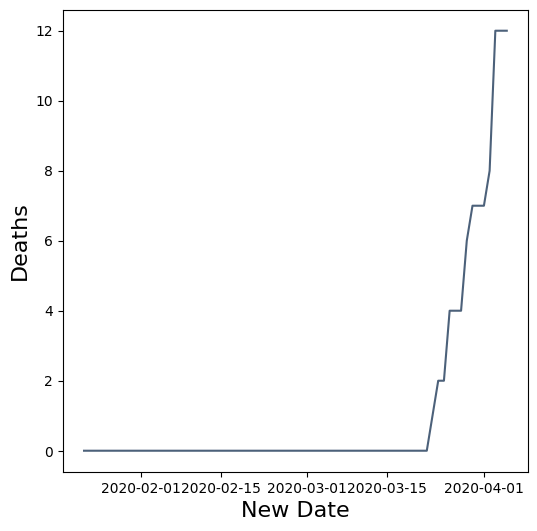

In [12]:
sorted_time_alameda.plot("New Date", "Deaths")


Now given a table that gives us each state and their respective death totals(check out `total_deaths_by_state`), **what is an appropriate way to visualize the death totals for each state in one plot?**

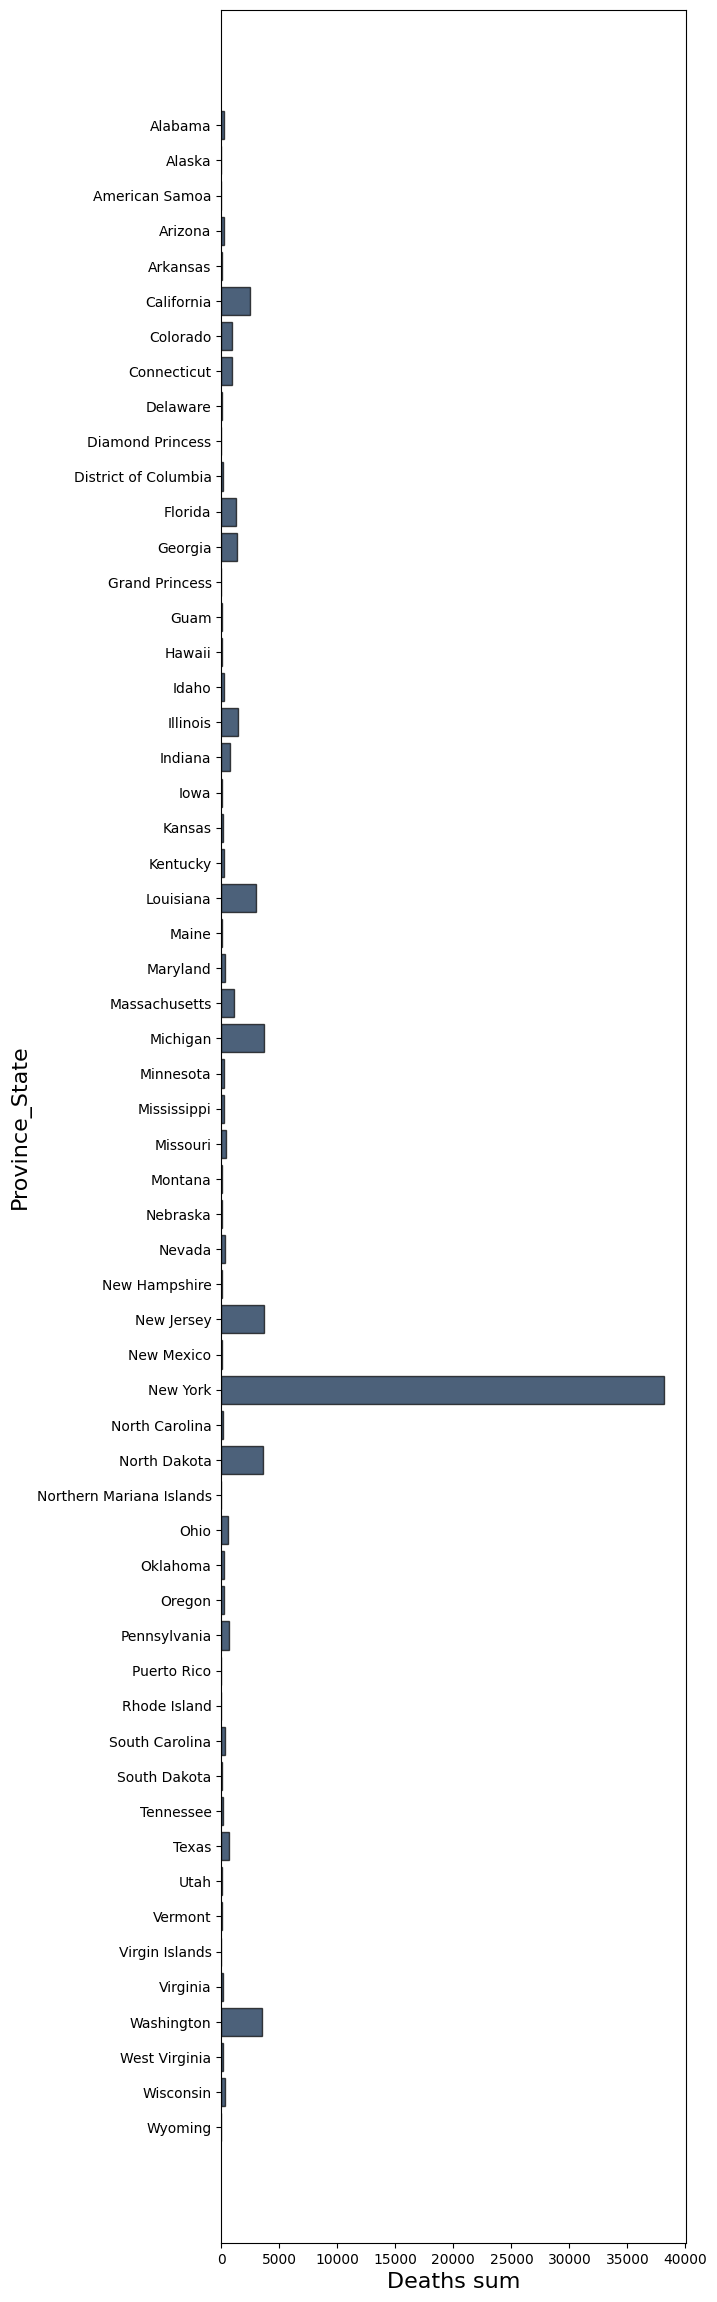

In [16]:
total_deaths_by_state = covid_us.select("Province_State", "Deaths").group("Province_State", sum)
total_deaths_by_state.barh("Province_State", "Deaths sum")

**How should we visualize the relationship between confirmed cases and deaths in Alameda county?**

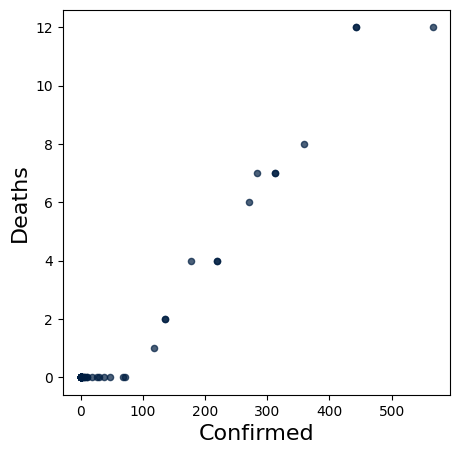

In [20]:
sorted_time_alameda.scatter("Confirmed", "Deaths")


**How do we visualize the distribution of death totals per day in Alameda county?**

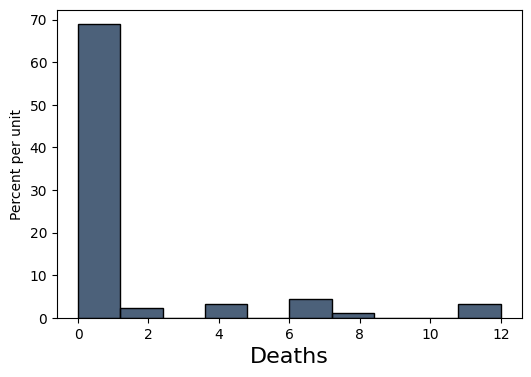

In [21]:
covid_alameda_county.hist("Deaths")